In [106]:
#Import Library

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression  
from sklearn.preprocessing import LabelEncoder

In [107]:
df = pd.read_excel(r"C:\Users\bryan\Downloads\AFL 2 DM\customer_analysis.xlsx")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [108]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [109]:
most_frequent_income = df['Income'].mode()[0]
df['Income'] = df['Income'].fillna(most_frequent_income)

In [110]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [111]:
df['Age'] = 2024 - df['Year_Birth']
df = df.drop(columns=['ID', 'Year_Birth', 'Dt_Customer'])
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,0,0,3,11,1,67
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,0,3,11,0,70
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,0,3,11,0,59
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,0,3,11,0,40
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,0,3,11,0,43


In [112]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000
mean,51767.816518,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,...,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,55.194196
std,25458.285477,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,...,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,11.984069
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,28.000000
25%,34722.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,47.000000
50%,51075.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,54.000000
75%,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,65.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,131.000000


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   object 
 1   Marital_Status       2240 non-null   object 
 2   Income               2240 non-null   float64
 3   Kidhome              2240 non-null   int64  
 4   Teenhome             2240 non-null   int64  
 5   Recency              2240 non-null   int64  
 6   MntWines             2240 non-null   int64  
 7   MntFruits            2240 non-null   int64  
 8   MntMeatProducts      2240 non-null   int64  
 9   MntFishProducts      2240 non-null   int64  
 10  MntSweetProducts     2240 non-null   int64  
 11  MntGoldProds         2240 non-null   int64  
 12  NumDealsPurchases    2240 non-null   int64  
 13  NumWebPurchases      2240 non-null   int64  
 14  NumCatalogPurchases  2240 non-null   int64  
 15  NumStorePurchases    2240 non-null   i

In [114]:
label_encoder = LabelEncoder()
df['Education'] = label_encoder.fit_transform(df['Education'])
df['Marital_Status'] = label_encoder.fit_transform(df['Marital_Status'])
dfs = df.astype('int64')

In [115]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Education            2240 non-null   int64
 1   Marital_Status       2240 non-null   int64
 2   Income               2240 non-null   int64
 3   Kidhome              2240 non-null   int64
 4   Teenhome             2240 non-null   int64
 5   Recency              2240 non-null   int64
 6   MntWines             2240 non-null   int64
 7   MntFruits            2240 non-null   int64
 8   MntMeatProducts      2240 non-null   int64
 9   MntFishProducts      2240 non-null   int64
 10  MntSweetProducts     2240 non-null   int64
 11  MntGoldProds         2240 non-null   int64
 12  NumDealsPurchases    2240 non-null   int64
 13  NumWebPurchases      2240 non-null   int64
 14  NumCatalogPurchases  2240 non-null   int64
 15  NumStorePurchases    2240 non-null   int64
 16  NumWebVisitsMonth    224

In [122]:
X = dfs.drop('Response', axis=1)  
y = dfs['Response']  

feature_names = X.columns

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


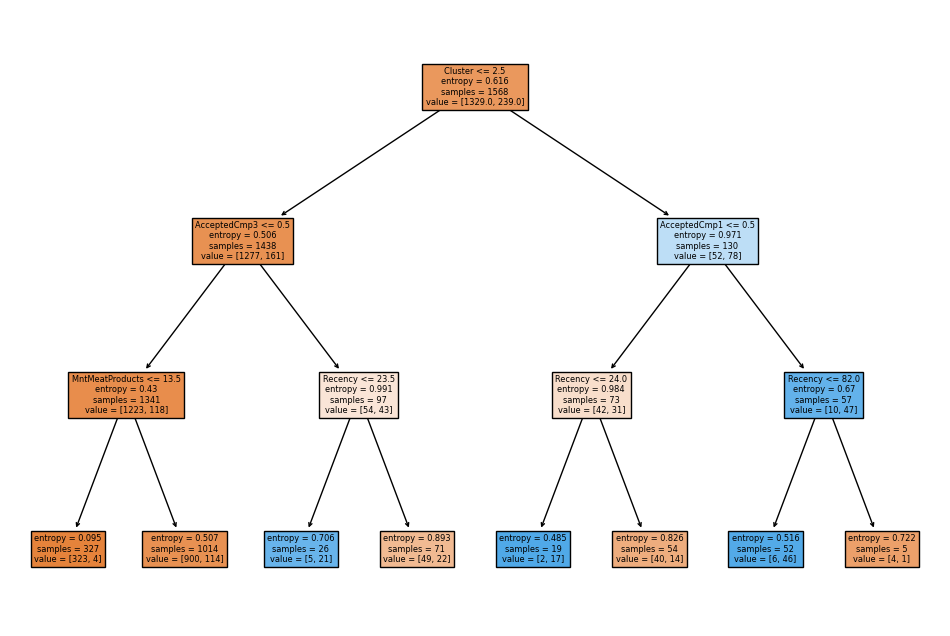

Akurasi (Entropy): 0.87
Akurasi pada data pelatihan (Entropy): 0.89


In [123]:
# Decision Tree untuk prediksi menggunakan model Decision Tree
dt_entropy = DecisionTreeClassifier(criterion='entropy',max_depth = 3, random_state=42)
dt_entropy.fit(X_train, y_train)
y_pred_entropy = dt_entropy.predict(X_test)

# For plotting the decision tree, use the original feature names
plt.figure(figsize=(12, 8))
plt.title("Decision Tree (Entropy)")
plot_tree(dt_entropy, filled=True, feature_names=feature_names)
plt.show()

# Untuk Mengetahui Akurasi Algoritma Entropy
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print(f"Akurasi (Entropy): {accuracy_entropy:.2f}")

# Untuk Mengetahui Akurasi Pada Pelatihan Data Dengan Algoritma Entropy
train_accuracy_entropy = accuracy_score(y_train, dt_entropy.predict(X_train))
print(f"Akurasi pada data pelatihan (Entropy): {train_accuracy_entropy:.2f}")

In [124]:
# Naive Bayes untuk prediksi menggunakan model Naive Bayes
nb_model = GaussianNB()  
nb_model.fit(X_train, y_train)  
nb_predictions = nb_model.predict(X_test) 

# Untuk Mengetahui Akurasi Naive Bayes
accuracy_nb = accuracy_score(y_test, nb_predictions)  
print(f"Akurasi Naive Bayes: {accuracy_nb:.2f}")  

Akurasi Naive Bayes: 0.76


In [125]:
# Logistic Regression untuk prediksi menggunakan model Logistic Regression
lr_model = LogisticRegression(max_iter=200, random_state=42)  
lr_model.fit(X_train, y_train)  
lr_predictions = lr_model.predict(X_test)  

# Untuk Mengetahui Akurasi Logistic Regression  
accuracy_lr = accuracy_score(y_test, lr_predictions)  
print(f"Akurasi Logistic Regression: {accuracy_lr:.2f}")

Akurasi Logistic Regression: 0.86


c:\Users\bryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
